In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

import tensorflow as tf

import keras
from keras.models import load_model
from keras.utils import plot_model

%matplotlib inline

Using TensorFlow backend.


In [2]:
image1 = mpimg.imread('data-sources/my-keys-data/IMG/center_2017_04_30_23_52_40_325.jpg')
image2 = mpimg.imread('data-sources/my-keys-data/IMG/center_2017_04_30_23_52_41_312.jpg')
image3 = mpimg.imread('data-sources/my-keys-data/IMG/center_2017_04_30_23_53_50_611.jpg')
image4 = mpimg.imread('data-sources/my-data/IMG/center_2017_04_30_23_39_00_800.jpg')

images = [image1, image2, image3, image4]

This image is: <class 'numpy.ndarray'> with dimesions: (160, 320, 3)


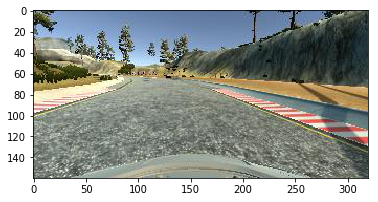

This image is: <class 'numpy.ndarray'> with dimesions: (160, 320, 3)


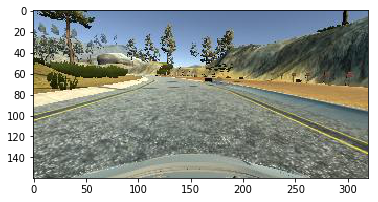

This image is: <class 'numpy.ndarray'> with dimesions: (160, 320, 3)


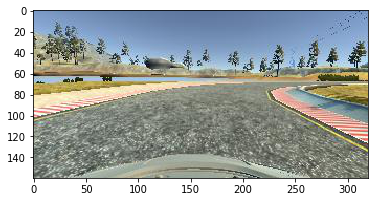

This image is: <class 'numpy.ndarray'> with dimesions: (160, 320, 3)


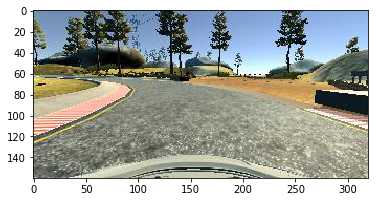

In [3]:
#printing out some stats and plotting
for image in images:
    print('This image is:', type(image), 'with dimesions:', image.shape)
    plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
    plt.show()

In [4]:
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def huescale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def yuv(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

def nvidia_preprocess(image):
    image = image[int(image.shape[0]/3):shape[0], 0:shape[1]]
    image = cv2.resize(image, (img_rows, img_cols), interpolation=cv2.INTER_AREA)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)

In [5]:
def process_image(image):     
    hsv_image = huescale(image)

    yellow_mask = cv2.inRange(hsv_image, np.array([20, 100, 100]), np.array([40, 255, 255]))
    white_mask = cv2.inRange(hsv_image, np.array([0, 0, 230]), np.array([255, 255, 255]))
    
    gray_image = grayscale(image)        
    masked_image = cv2.bitwise_and(gray_image, white_mask | yellow_mask)
    blur_gray = gaussian_blur(masked_image, 3)
    
    return hsv_image

64
(32, 64)


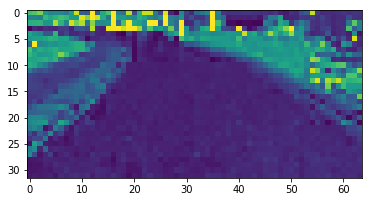

In [6]:
print(int(image4.shape[0] / 2.5))
processed_image = image4
processed_image = image4[int(image4.shape[0] / 3):image4.shape[0] - 20, 0:image4.shape[1]]
processed_image = huescale(processed_image)[:,:,1]
processed_image = cv2.resize(processed_image, (64, 32))
print(processed_image.shape)
plt.imshow(processed_image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
plt.show()

In [20]:
cropped_image = image4[int(image4.shape[0] / 3):image4.shape[0] - 20, 0:image4.shape[1]]
cropped_image = cropped_image / 255.

image_tensor = tf.placeholder(tf.float32, [cropped_image.shape[0], cropped_image.shape[1], cropped_image.shape[2]])
resize_tensor = tf.image.resize_images(image_tensor, [32, 64])
hsv_tensor = tf.image.rgb_to_hsv(resize_tensor)
saturation_tensor = tf.slice(hsv_tensor, [0, 0, 1], [-1, -1, 1])

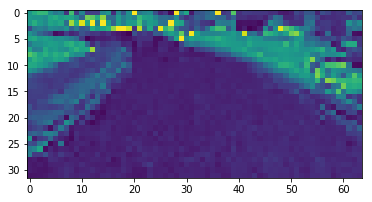

In [21]:
with tf.Session() as sess:
    saturation_image = sess.run(saturation_tensor, feed_dict={image_tensor: cropped_image})
    #print(saturation_image.shape)
    plt.imshow(saturation_image.squeeze())
    plt.show()
    mpimg.imsave("report_images/tiny_processed_image.jpg", saturation_image.squeeze())

In [3]:
model = load_model('model.h5')

In [4]:
plot_model(model, to_file='model_plot.png')

AttributeError: module 'pydot' has no attribute 'find_graphviz'